# descr

- 

## 데이터 준비

In [1]:
import quandl

QUANDL_API_KEY = "FKTM3JuTxzCy-6cgwWwt"
quandl.ApiConfig.api_key = QUANDL_API_KEY

In [2]:
dataKey = 'EURONEXT/ABN'
df = quandl.get(dataKey)

In [3]:
df.head()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.18,18.43,18.000,18.35,38392898.0,7.003281e+08
2015-11-23,18.45,18.70,18.215,18.61,3352514.0,6.186446e+07
2015-11-24,18.70,18.80,18.370,18.80,4871901.0,8.994087e+07
2015-11-25,18.85,19.50,18.770,19.45,4802607.0,9.153862e+07
2015-11-26,19.48,19.67,19.410,19.43,1648481.0,3.220713e+07


In [4]:
prices = df.loc[:,'Last']
volumes = df.loc[:, 'Volume']

In [5]:
volumes.head(3)

Date
2015-11-20    38392898.0
2015-11-23     3352514.0
2015-11-24     4871901.0
Name: Volume, dtype: float64

## 가격과 거래량 차트
- plot_prciesVol

In [6]:
import matplotlib.pyplot as plt

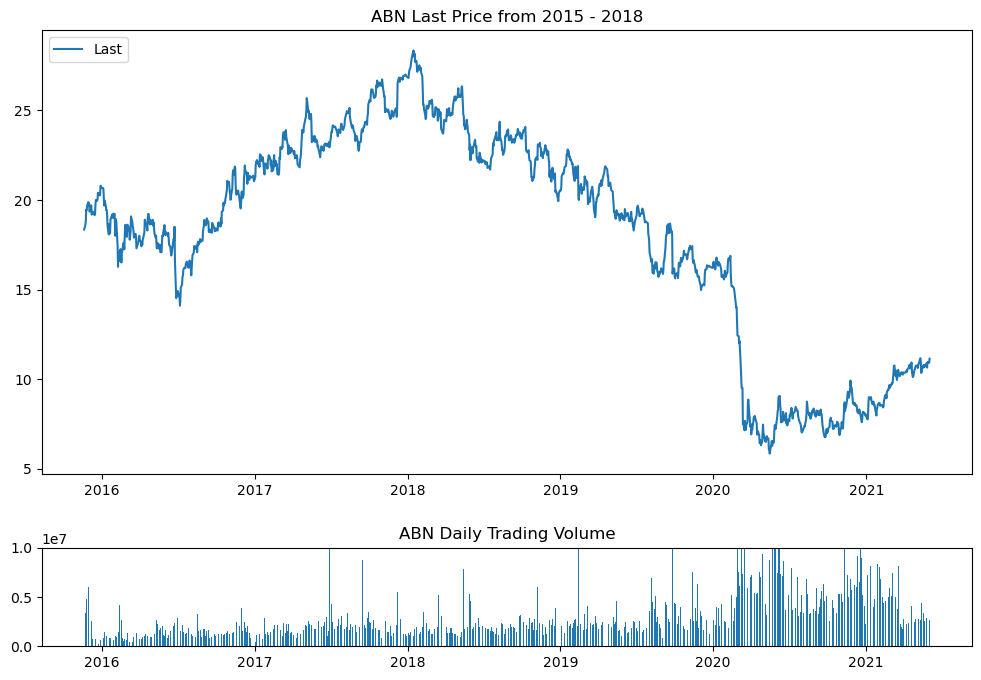

In [7]:
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Last')
plt.title("ABN Last Price from 2015 - 2018")
plt.legend(loc=2)

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title("ABN Daily Trading Volume")
plt.ylim(0,1e+07)

plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)          

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_prciesVol(prices:pd.Series, volumes:pd.Series, titleTop:str=None, titleBtm:str=None):
    """
    prices: 
        Date
    2015-11-20    18.35
    2015-11-23    18.61
    2015-11-24    18.80
    Name: Last, dtype: float64

    Volumes:
        Date
    2015-11-20    38392898.0
    2015-11-23     3352514.0
    2015-11-24     4871901.0
    Name: Volume, dtype: float64
    """
    top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
    top.plot(prices.index, prices, label='Last')
    plt.title(titleTop)
    plt.legend(loc=2)
    
    bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
    bottom.bar(volumes.index, volumes)
    plt.title(titleBtm)
    plt.ylim(0,1e+07)
    
    plt.gcf().set_size_inches(12, 8)
    plt.subplots_adjust(hspace=0.75)     
    return plt.show()

##  캔들 차트
- plot_ohlc

In [10]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

C:\Users\taest\miniconda3\envs\mlft310\lib\site-packages\mpl_finance.py:16: DeprecationWarning:





    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/





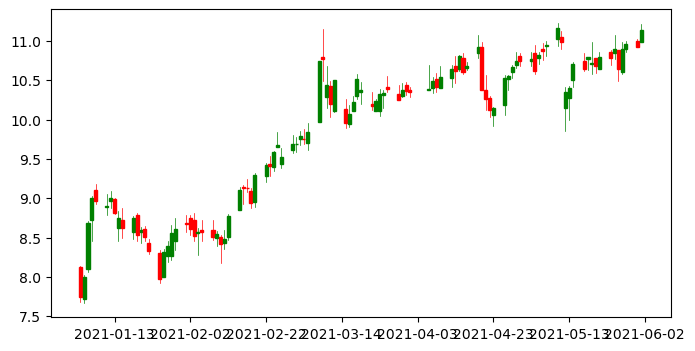

In [11]:
df_subset = quandl.get(dataKey,start_date = '2021-01-01',
                       end_date='2023-09-29')
df_subset.loc[:,'Date'] = df_subset.index.map(mdates.date2num)
df_ohlc =  df_subset.loc[:, ['Date', 'Open', 'High', 'Low', 'Last']]
figure, ax = plt.subplots(figsize=(8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax,
                 df_ohlc.values,
                 width=0.8,
                 colorup='green',
                 colordown='red')
plt.show()

In [12]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

def plot_ohlc(df_subset:pd.DataFrame):

    """
    	Open	High	Low	Last	Volume	Turnover
    Date						
    2021-01-04	8.120	8.140	7.674	7.750	7210952.0	56828789.0
    2021-01-05	7.720	8.022	7.664	8.002	8368386.0	66391129.0
    2021-01-06	8.100	8.716	8.060	8.690	12623423.0	107210834.0
    2021-01-07	8.726	9.024	8.458	9.000	11016409.0	97302392.0
    2021-01-08	9.100	9.178	8.932	8.964	7435833.0	67180948.0
    """
    df_subset.loc[:,'Date'] = df_subset.index.map(mdates.date2num)
    df_ohlc =  df_subset.loc[:, ['Date', 'Open', 'High', 'Low', 'Last']]
    figure, ax = plt.subplots(figsize=(8,4))
    formatter = mdates.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(formatter)
    candlestick_ohlc(ax,
                     df_ohlc.values,
                     width=0.8,
                     colorup='green',
                     colordown='red')
    return plt.show()

## 수익률 차트
- Plot return

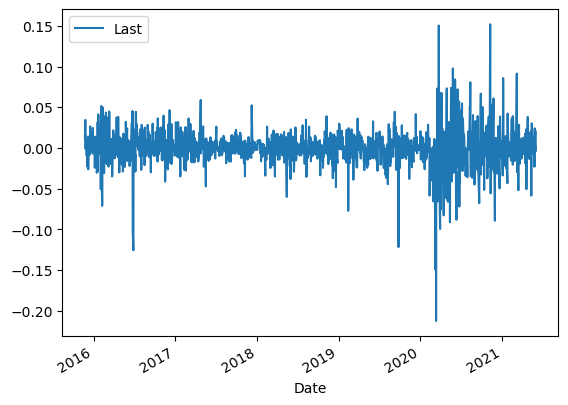

In [13]:
%matplotlib inline
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods=1)
daily_changes.plot();

- 누적 수익률 차트

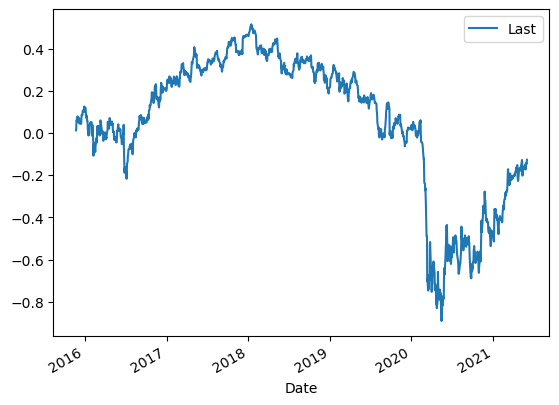

In [14]:
df_cumsum = daily_changes.cumsum()
df_cumsum.plot();

- 수익률 히스토그램

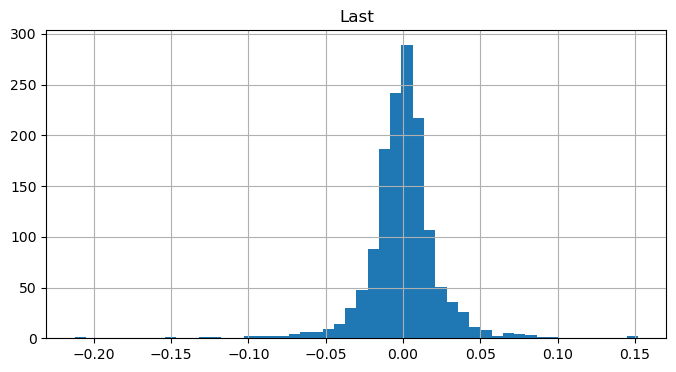

In [15]:
daily_changes.hist(bins=50, figsize=(8, 4));

- 수익률 정규 분포: QQ plot _ 정규성 검정

In [16]:
from scipy import stats
from scipy.stats import probplot

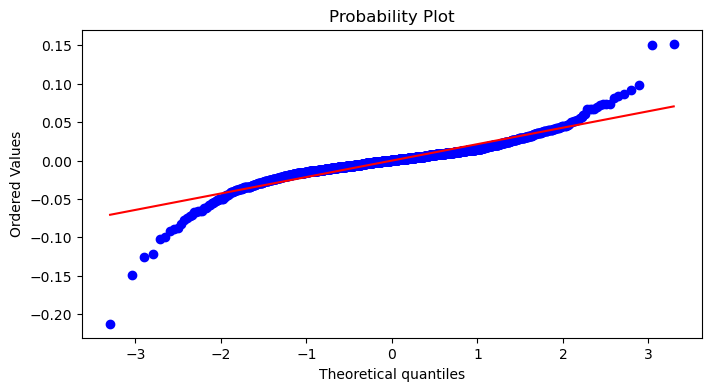

In [17]:
daily_changes = df.pct_change(periods=1).dropna()
figure = plt.figure(figsize=(8,4))
ax = figure.add_subplot(111)
stats.probplot(daily_changes.loc[:, "Last"], dist= 'norm', plot=ax)
plt.show()

## Plot_ma

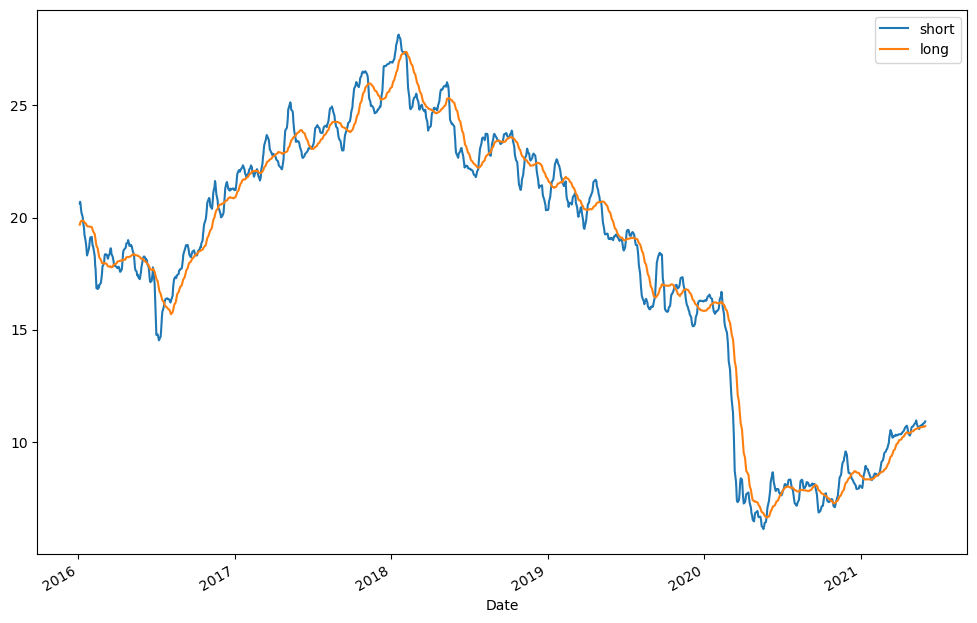

In [18]:
df_filled =df.asfreq('D', method='ffill')
df_last = df.loc[:, "Last"]

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()
df_sma = pd.merge(series_short, series_long, left_index=True, right_index= True).dropna()
df_sma.columns = ["short", "long"]
df_sma.plot(figsize=(12,8));


In [19]:
def plot_ma(ds:pd.Series):
    """
    df_filled =df.asfreq('D', method='ffill')
    ds = df.loc[:, "Last"]

        Date
    2015-11-20    18.35
    2015-11-23    18.61
    2015-11-24    18.80
    2015-11-25    19.45
    2015-11-26    19.43
    Name: Last, dtype: float64
    """
    series_short = ds.rolling(window=5, min_periods=5).mean()
    series_long = ds.rolling(window=30, min_periods=30).mean()
    df_sma = pd.merge(series_short, series_long, left_index=True, right_index= True).dropna()
    df_sma.columns = ["short", "long"]
    return df_sma.plot(figsize=(12,8))

## plot_EMA

In [20]:

def plot_ma(ds:pd.Series, mode:str="ewm"):
    """
    df_filled =df.asfreq('D', method='ffill')
    ds = df.loc[:, "Last"]

        Date
    2015-11-20    18.35
    2015-11-23    18.61
    2015-11-24    18.80
    2015-11-25    19.45
    2015-11-26    19.43
    Name: Last, dtype: float64
    """
    if mode == "ewm":
        series_short = ds.ewm(span=5).mean()
        series_long = ds.ewm(span=30).mean()
    else:
        series_short = ds.rolling(window=5, min_periods=5).mean()
        series_long = ds.rolling(window=30, min_periods=30).mean()
    df_sma = pd.merge(series_short, series_long, left_index=True, right_index= True).dropna()
    df_sma.columns = ["short", "long"]
    df_sma.plot(figsize=(12,8))

    return plt.show()


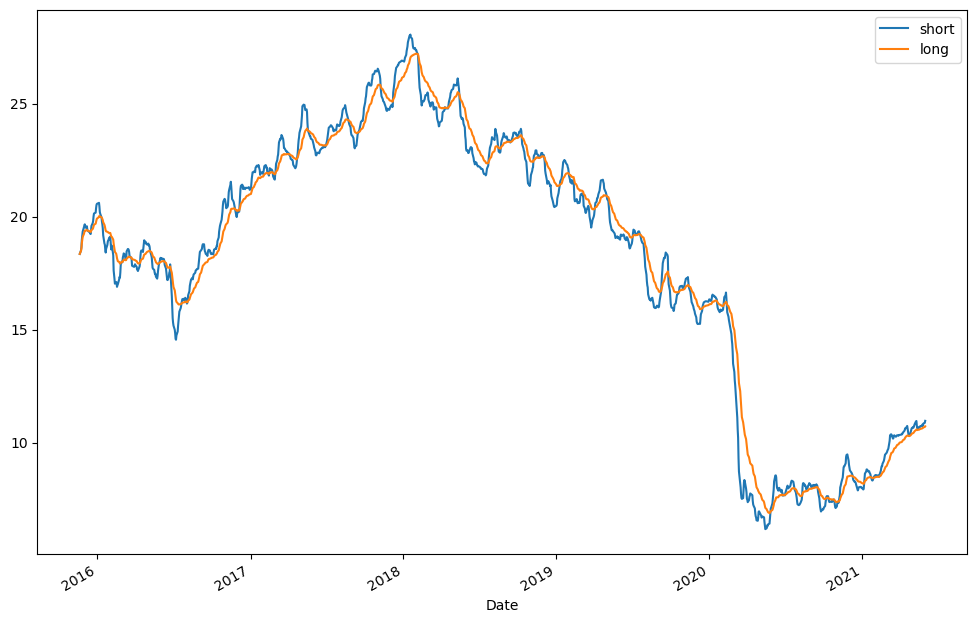

In [21]:
plot_ma(df_last, mode="ewm")

## Plotting for prices

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from scipy import stats
import quandl

QUANDL_API_KEY = "FKTM3JuTxzCy-6cgwWwt"

class PlotFin:
    def __init__(self):
        pass

    def get(self,ticker:str='aapl', start_date = '2021-01-01',
                       end_date='2023-09-29',src = 'quandl'):
        self.ticker = ticker
        if src == "yahoo":
            pass
        elif src == "investing":
            pass
        else: #src == quandle:
            quandl.ApiConfig.api_key = QUANDL_API_KEY
            df_subset = quandl.get(ticker, start_date= start_date, end_date = end_date)
            self.prices = df_subset.loc[:, 'Last']
            self.volumes = df_subset.loc[:, 'Volume']
            df_subset.loc[:, 'Date'] = df_subset.index.map(mdates.date2num)
            self.df_ohlc = df_subset.loc[:, ['Date', 'Open', 'High', 'Low', 'Last']]
            self.idx = df_subset.index

    def descr(self):
        return f"index: {self.idx[0]}, {self.idx[-1]} \n len: {len(self.idx)}"

    def plot_prciesVolumes(self, ylim_volumns=1e+07):
        """
        prices:
            Date
        2015-11-20    18.35
        2015-11-23    18.61
        2015-11-24    18.80
        Name: Last, dtype: float64

        Volumes:
            Date
        2015-11-20    38392898.0
        2015-11-23     3352514.0
        2015-11-24     4871901.0
        Name: Volume, dtype: float64
        """
        top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
        top.plot(self.prices.index, self.prices, label='Last')
        plt.title(f"{self.ticker} prices")
        plt.legend(loc=2)

        bottom = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)
        bottom.bar(self.volumes.index, self.volumes)
        plt.title(f"{self.ticker} volumes")
        plt.ylim(0, ylim_volumns)

        plt.gcf().set_size_inches(12, 8)
        plt.subplots_adjust(hspace=0.75)
        return plt.show()

    def plot_ohlc(self):
        """
            Open	High	Low	Last	Volume	Turnover
        Date
        2021-01-04	8.120	8.140	7.674	7.750	7210952.0	56828789.0
        2021-01-05	7.720	8.022	7.664	8.002	8368386.0	66391129.0
        2021-01-06	8.100	8.716	8.060	8.690	12623423.0	107210834.0
        2021-01-07	8.726	9.024	8.458	9.000	11016409.0	97302392.0
        2021-01-08	9.100	9.178	8.932	8.964	7435833.0	67180948.0
        """
        figure, ax = plt.subplots(figsize=(8,4))
        formatter = mdates.DateFormatter('%Y-%m-%d')
        ax.xaxis.set_major_formatter(formatter)
        candlestick_ohlc(ax,
                         self.df_ohlc.values,
                         width=0.8,
                         colorup='green',
                         colordown='red')
        return plt.show()

    def plot_return(self, mode:str='cummulative'):
        """
        mode : histogram,  volatility
                Last
        Date
        2015-11-20	18.35
        2015-11-23	18.61
        2015-11-24	18.80
        2015-11-25	19.45
        2015-11-26	19.43
        """
        ds = self.prices
        ds_filled = ds.asfreq('D', method='ffill')
        ds_returns = ds_filled.pct_change(periods=1)
        if mode == "histogram":
            ds_returns.hist(bins=50, figsize=(8, 4))
        elif mode == "volatility":
            ds_std = ds_returns.rolling(window=30, min_periods=30).std()
            ds_std.plot()
        elif mode == "qq":
            daily_changes = ds.pct_change(periods=1).dropna() #calculate return
            figure = plt.figure(figsize=(8,4))
            ax = figure.add_subplot(111)
            stats.probplot(daily_changes, dist= 'norm', plot=ax)
        else: # mode == "cummulative":
            ds_cumsum = ds_returns.cumsum()
            ds_cumsum.plot()
        return plt.show()

    def plot_ma(self, mode:str="simple"):
        """
        mode : simple, ewm

        df_filled =df.asfreq('D', method='ffill')
        ds = df.loc[:, "Last"]

            Date
        2015-11-20    18.35
        2015-11-23    18.61
        2015-11-24    18.80
        2015-11-25    19.45
        2015-11-26    19.43
        Name: Last, dtype: float64
        """
        ds = self.prices
        if mode == "ewm":
            series_short = ds.ewm(span=5).mean()
            series_long = ds.ewm(span=30).mean()
        else: #mode:str="simple"
            series_short = ds.rolling(window=5, min_periods=5).mean()
            series_long = ds.rolling(window=30, min_periods=30).mean()
        df_sma = pd.merge(series_short, series_long, left_index=True, right_index= True).dropna()
        df_sma.columns = ["short", "long"]
        df_sma.plot(figsize=(12,8))
        return plt.show()



In [23]:
pf = PlotFin()
pf.get('EURONEXT/ABN')

In [24]:
pf.descr()

'index: 2021-01-04 00:00:00, 2021-06-01 00:00:00 \n len: 105'

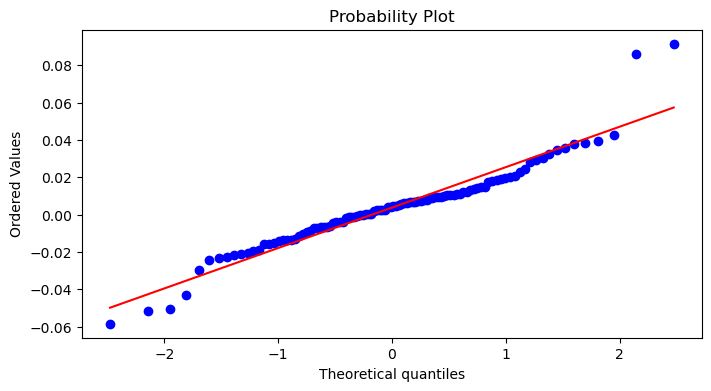

In [25]:
pf.plot_return('qq')

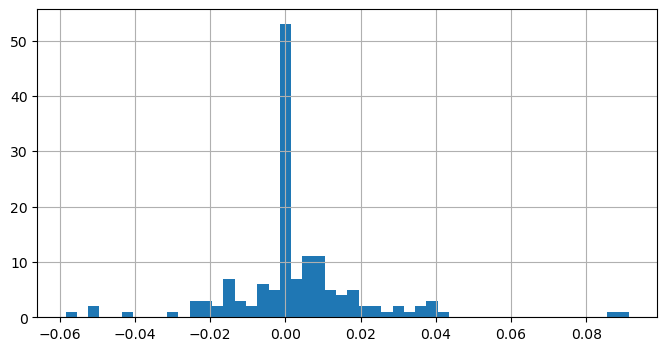

In [26]:
pf.plot_return('histogram')

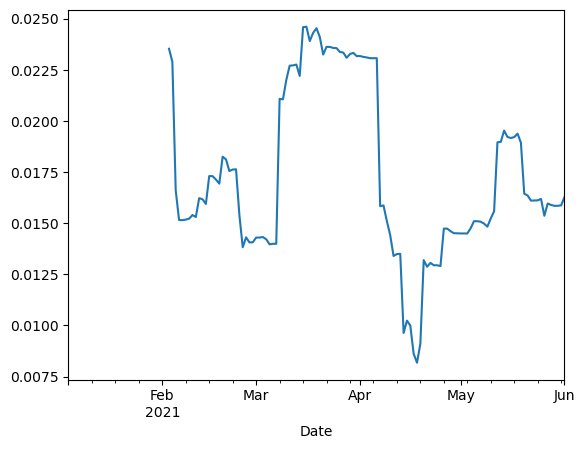

In [27]:
pf.plot_return('volatility')

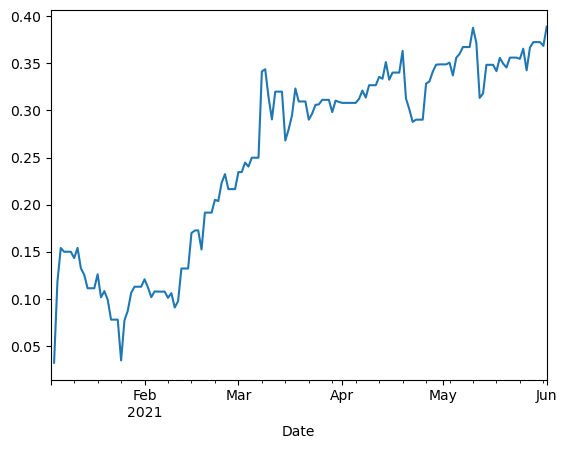

In [28]:
pf.plot_return()

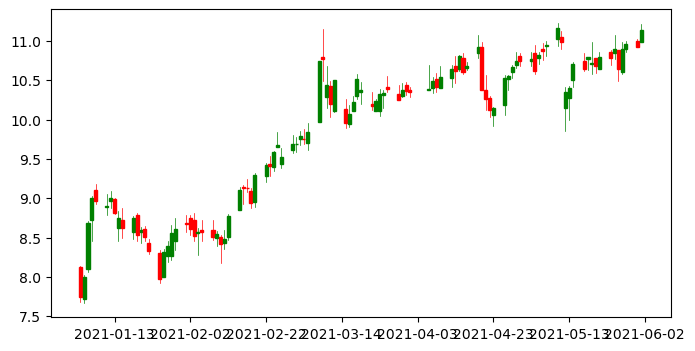

In [29]:
pf.plot_ohlc()

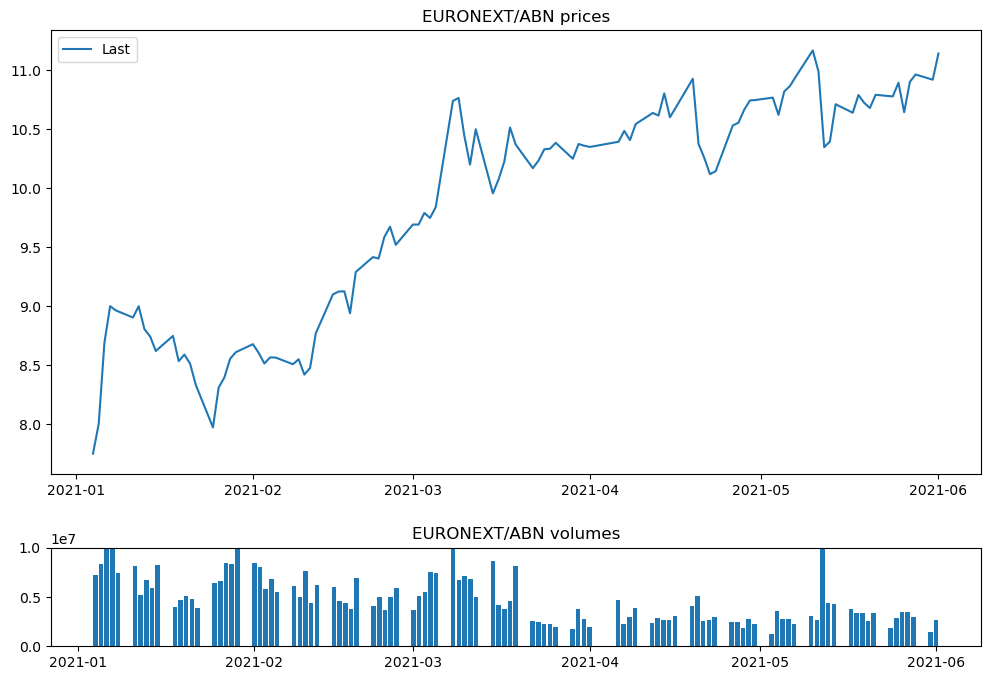

In [30]:
pf.plot_prciesVolumes()

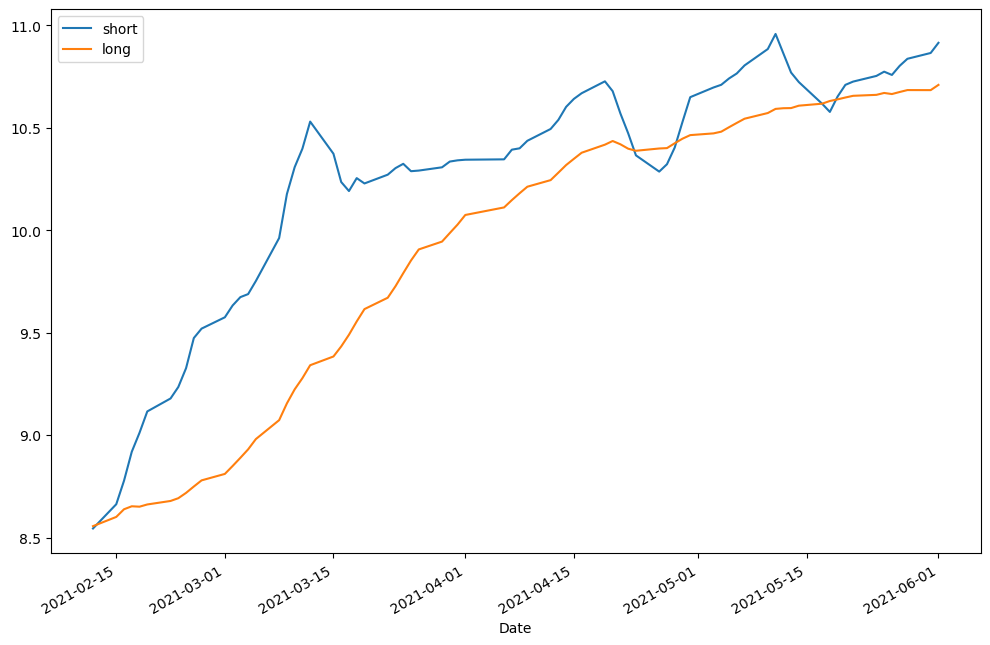

In [31]:
pf.plot_ma()

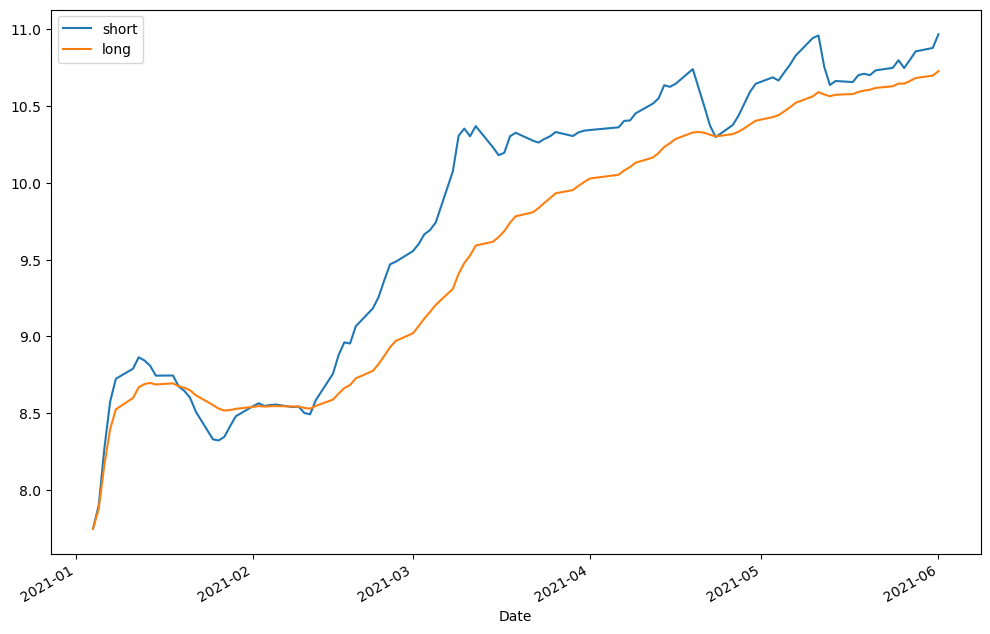

In [32]:
pf.plot_ma('ewm')